# Introduction to Machine Learning Model Evaluation for British Airways Booking Dataset

Submitted by: Viraj Panchal

In this project, we delve into the British Airways booking dataset provided by Forage’s virtual internship program. Our objective is to meticulously analyze the data to extract meaningful insights and predict booking completions. To achieve the highest possible accuracy, precision, and recall, we employ a variety of machine learning models. Each model’s performance is rigorously evaluated to determine its efficacy in our predictive task.

Furthermore, we implement feature selection techniques to identify the most influential factors that contribute to booking completions. By focusing on the most relevant features, we enhance our models’ interpretability and efficiency, ensuring that British Airways can leverage these insights for strategic decision-making.

The following Python snippet encapsulates our approach to model training, evaluation, and feature selection, serving as a testament to the power of data-driven solutions in the aviation industry.

This introduction sets the stage for your code snippet, highlighting the goals and the significance of the analysis you performed. It’s tailored to fit the context of a virtual internship project and emphasizes the practical application of the findings.

In [1]:
import os
import warnings
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

%matplotlib inline
warnings.filterwarnings('ignore')  # Suppress warning messages


In [2]:
# Load the CSV file into a DataFrame
df = pd.read_csv('customer_booking.csv', encoding="cp1252")

# Create deep copies of the DataFrame
df1 = df.copy(deep=True)
df2 = df.copy(deep=True)

In [3]:
df1.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


The `.info()` method gives us a data description, telling us the names of the columns, their data types and how many null values we have. Fortunately, we have no null values. It looks like some of these columns should be converted into different data types, e.g. flight_day.

To provide more context, below is a more detailed data description, explaining exactly what each column means:

- `num_passengers` = number of passengers travelling
- `sales_channel` = sales channel booking was made on
- `trip_type` = trip Type (Round Trip, One Way, Circle Trip)
- `purchase_lead` = number of days between travel date and booking date
- `length_of_stay` = number of days spent at destination
- `flight_hour` = hour of flight departure
- `flight_day` = day of week of flight departure
- `route` = origin -> destination flight route
- `booking_origin` = country from where booking was made
- `wants_extra_baggage` = if the customer wanted extra baggage in the booking
- `wants_preferred_seat` = if the customer wanted a preferred seat in the booking
- `wants_in_flight_meals` = if the customer wanted in-flight meals in the booking
- `flight_duration` = total duration of flight (in hours)
- `booking_complete` = flag indicating if the customer completed the booking

Before we compute any statistics on the data, lets do any necessary data conversion

In [4]:
# import dtale

In [5]:
# Display summary information about the DataFrame
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

In [6]:
# Generate descriptive statistics for the DataFrame
df1.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,1.000000,1.000000,1.000000,9.500000,1.000000


In [7]:
# Display the shape of the DataFrame 'df1'
print(df1.shape)

(50000, 14)


In [8]:
# Display data types of each column in 'df1'
print(df1.dtypes)

num_passengers             int64
sales_channel             object
trip_type                 object
purchase_lead              int64
length_of_stay             int64
flight_hour                int64
flight_day                object
route                     object
booking_origin            object
wants_extra_baggage        int64
wants_preferred_seat       int64
wants_in_flight_meals      int64
flight_duration          float64
booking_complete           int64
dtype: object


In [9]:
# Display the count of unique values in the 'booking_complete' column of 'df1'
print(df1['booking_complete'].value_counts())

0    42522
1     7478
Name: booking_complete, dtype: int64


We have identified an imbalance in our dataset, where the number of instances with a label of 0 is significantly higher at 42,522, compared to instances with a label of 1, which are only 7,478. This disparity can lead to biased model predictions favoring the majority class.

To mitigate this issue, we are implementing an undersampling strategy. This involves reducing the number of examples in the majority class (0s) to match the number of examples in the minority class (1s). By doing so, we aim to create a more balanced dataset that will help improve the performance and generalization of our predictive models.


In [10]:
# Define majority and minority class
majority_class = df1[df1['booking_complete'] == 0]
minority_class = df1[df1['booking_complete'] == 1]

# Undersample the majority class without replacement
undersampled_majority_class = majority_class.sample(n=len(minority_class), random_state=42)

# Concatenating the minority class with the undersampled majority class
df_undersampled = pd.concat([undersampled_majority_class, minority_class], axis=0)

# Shuffling the dataset
df_undersampled = df_undersampled.sample(frac=1, random_state=42).reset_index(drop=True)

# Now 'df_undersampled' is a balanced dataset with an equal number of instances from each class


In [11]:
# dtale.show(df_undersampled)

In [12]:
df1 = df_undersampled

In [13]:
# 'df1' is DataFrame
# Specifying the columns to check for outliers
outlier_columns = ['num_passengers', 'purchase_lead', 'length_of_stay']

# Removing outliers using the IQR method
for column in outlier_columns:
    Q1 = df1[column].quantile(0.25)
    Q3 = df1[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Filtering out the outliers and keeping only the valid values
    df1 = df1[(df1[column] >= lower_bound) & (df1[column] <= upper_bound)]

# 'df1' now has outliers removed from the specified columns


In [14]:
# dtale.show(df1)

In [15]:
# Calculate the sum of missing values in each column of 'df1'
missing_values = df1.isnull().sum()
print(missing_values)

num_passengers           0
sales_channel            0
trip_type                0
purchase_lead            0
length_of_stay           0
flight_hour              0
flight_day               0
route                    0
booking_origin           0
wants_extra_baggage      0
wants_preferred_seat     0
wants_in_flight_meals    0
flight_duration          0
booking_complete         0
dtype: int64


Separate the data into numerical and categorical

In [16]:
# Select columns with numerical data types
num = df1.select_dtypes(include=['number'])

# Select columns with categorical data types
cat = df1.select_dtypes(include=['object'])

# Display the first few rows of the numerical and categorical DataFrames
print("Numerical columns:\n", num.head())
print("Categorical columns:\n", cat.head())

Numerical columns:
    num_passengers  purchase_lead  length_of_stay  flight_hour  \
0               1             20              34           10   
1               1             19               6           18   
2               1             80               5            2   
3               1              7               2           14   
4               1             15               6           13   

   wants_extra_baggage  wants_preferred_seat  wants_in_flight_meals  \
0                    1                     0                      1   
1                    1                     1                      1   
2                    0                     0                      0   
3                    1                     1                      1   
4                    1                     1                      1   

   flight_duration  booking_complete  
0             4.67                 0  
1             8.58                 1  
2             6.42                 0  
3     

EDA

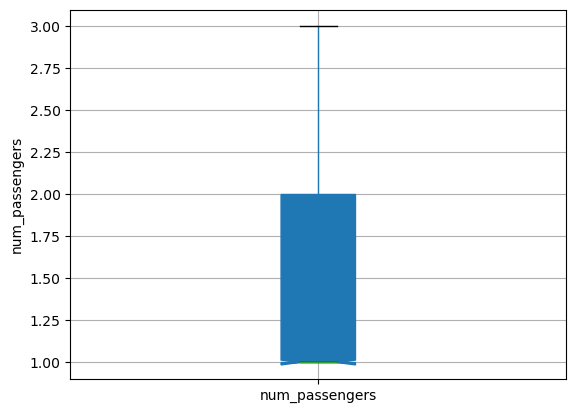

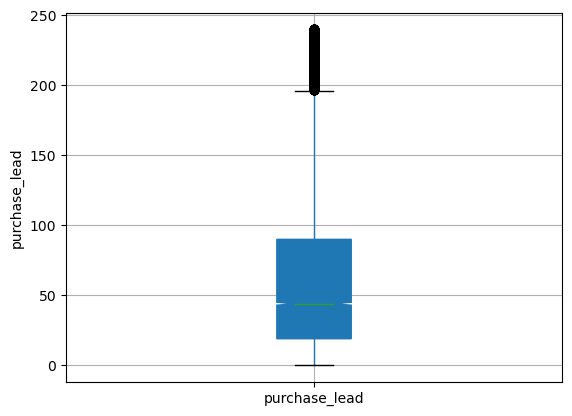

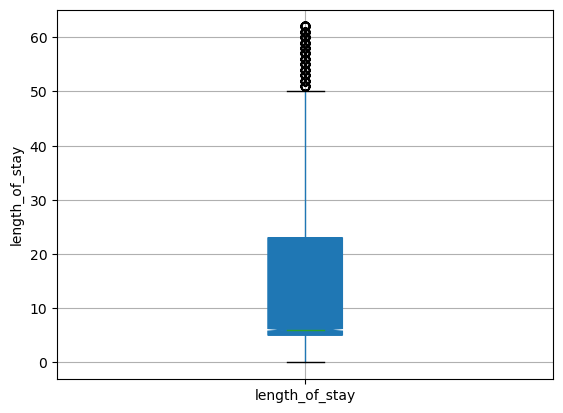

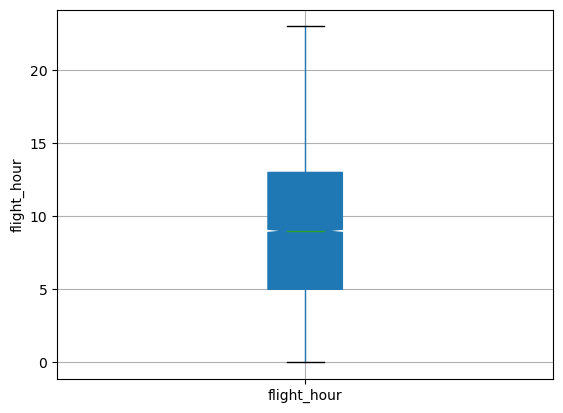

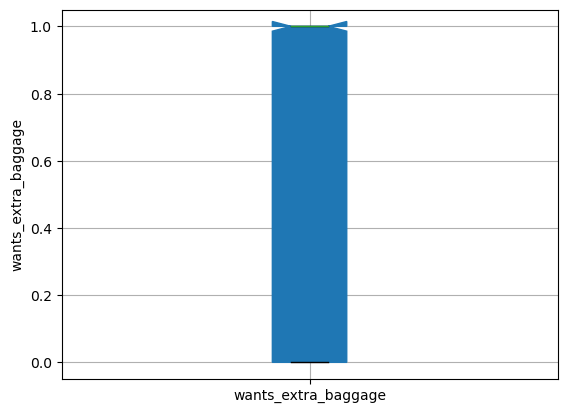

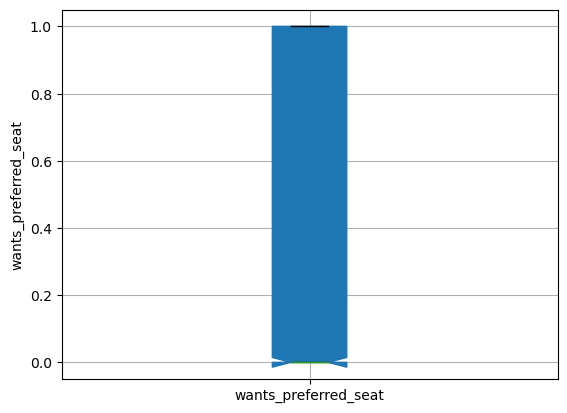

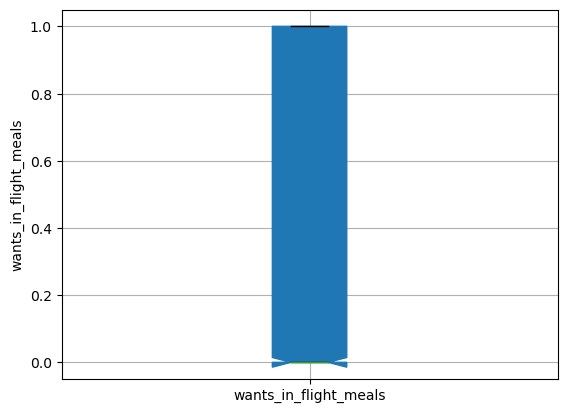

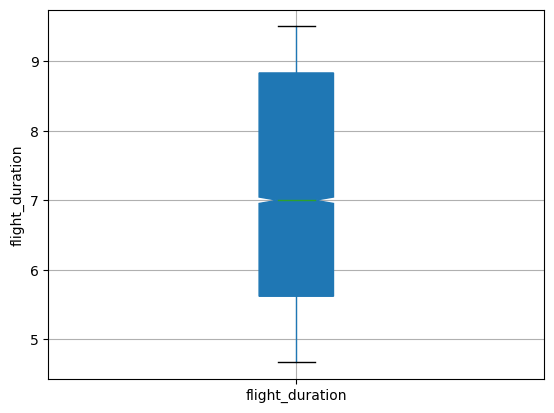

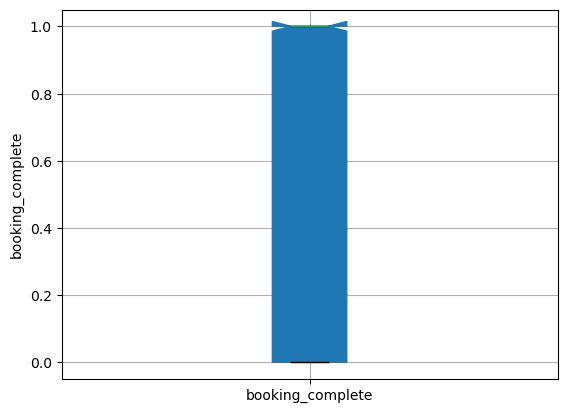

In [17]:
for i in num:
  num.boxplot(column = i, patch_artist = True, notch = True)
  plt.ylabel(i)
  plt.show()

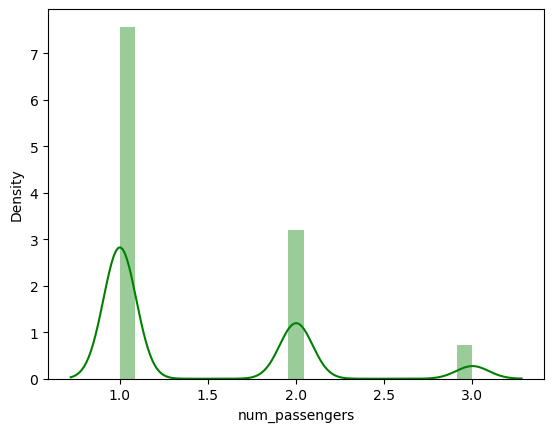

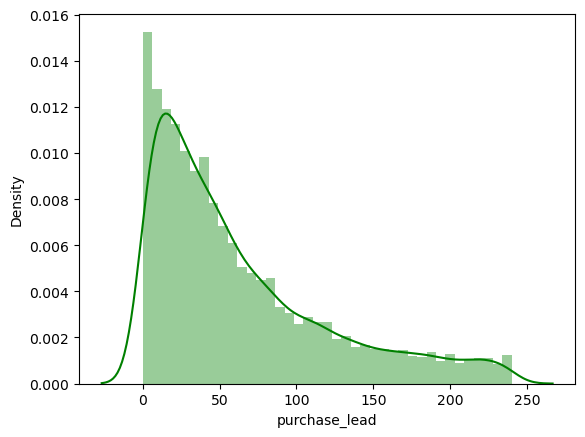

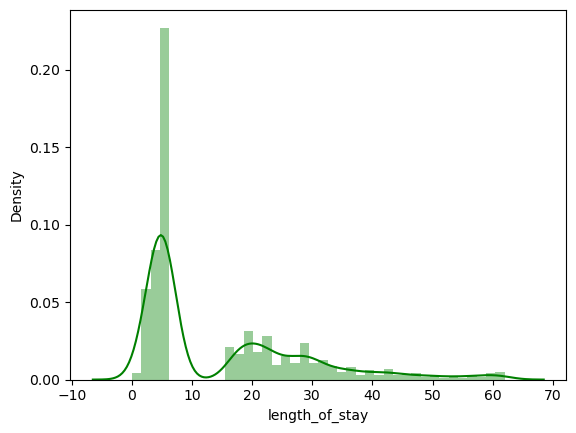

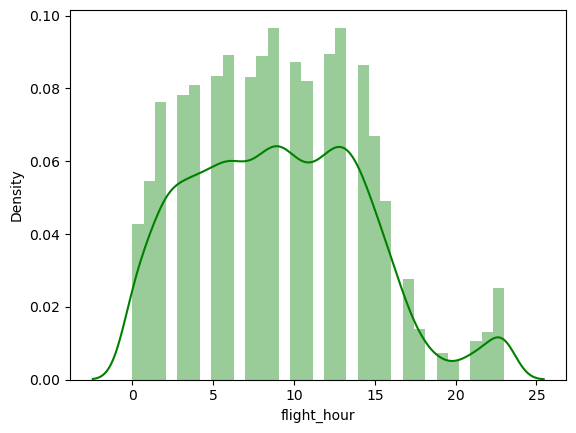

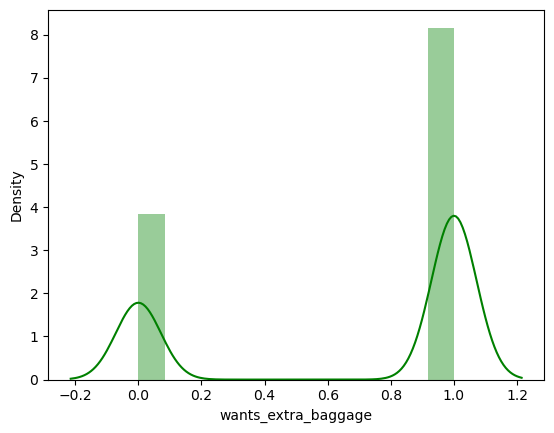

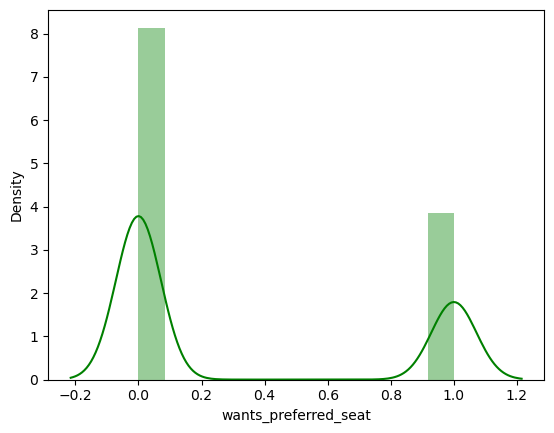

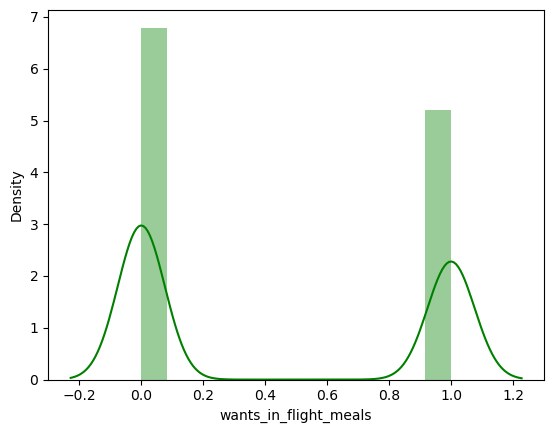

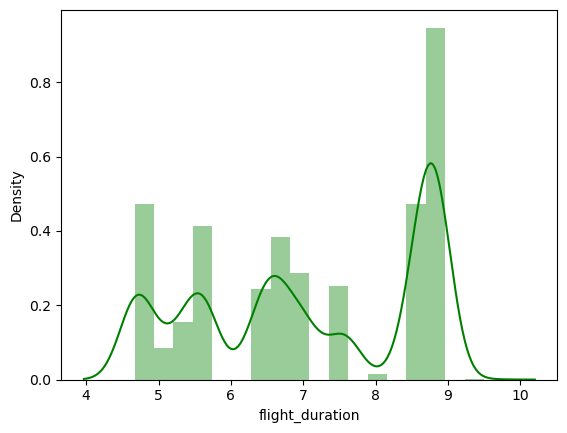

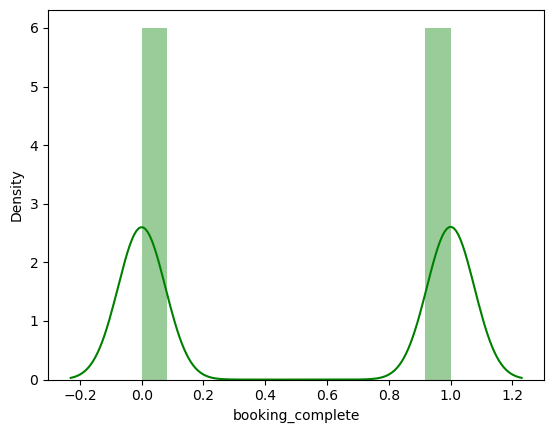

In [18]:
for i in num:
  sns.distplot(df1[i], kde = True, color = 'green')
  plt.show()

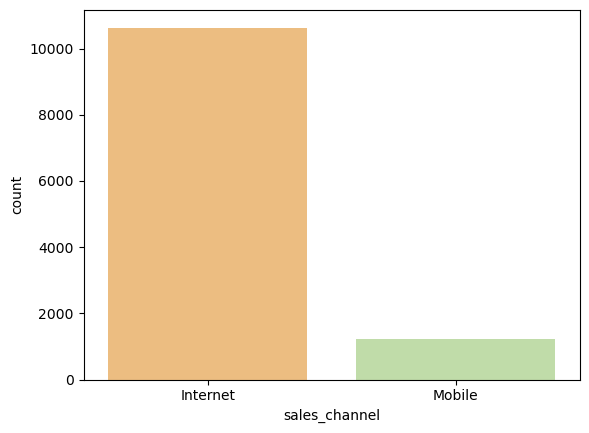

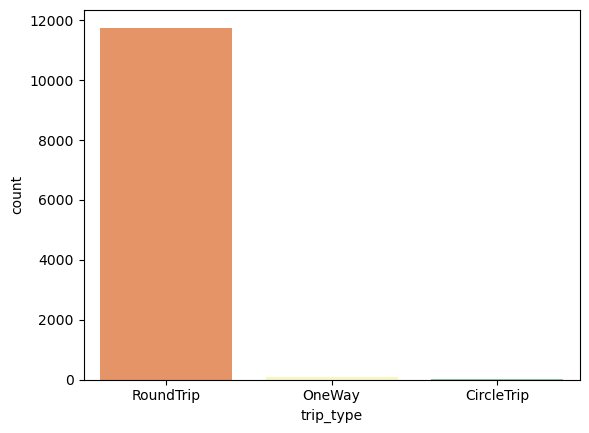

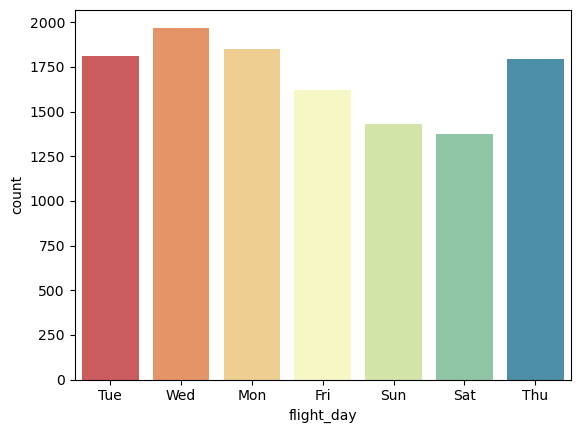

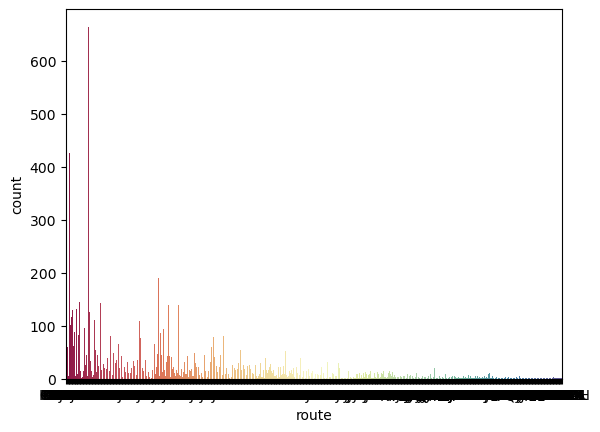

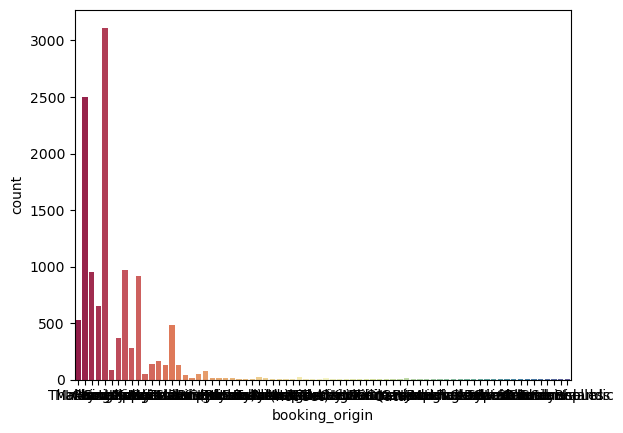

In [19]:
for i in cat:
  sns.countplot(x = df1[i], palette = 'Spectral')
  plt.show()

Remove Duplicates

In [20]:
df1[df1.duplicated()]

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
1797,1,Internet,RoundTrip,40,29,8,Wed,IKAPER,Australia,1,0,1,8.15,0
1944,2,Internet,RoundTrip,150,24,8,Wed,CCUMEL,India,1,1,1,8.83,1
1952,1,Internet,RoundTrip,100,42,17,Sun,AKLKUL,Malaysia,0,0,0,8.83,1
1987,2,Internet,RoundTrip,31,5,3,Tue,BWNPER,France,1,1,1,5.62,1
2093,2,Mobile,RoundTrip,101,6,14,Wed,ICNSYD,South Korea,1,0,1,8.58,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14264,2,Mobile,RoundTrip,29,6,6,Thu,DPSPVG,China,1,1,1,5.33,0
14271,2,Mobile,RoundTrip,82,6,0,Mon,JHBSYD,Singapore,1,1,0,8.58,1
14513,1,Internet,RoundTrip,12,45,10,Wed,KTMPEN,Malaysia,1,0,0,4.75,1
14523,1,Internet,RoundTrip,45,23,9,Tue,BWNKTM,Brunei,1,0,0,4.75,1


In [21]:
df1.drop_duplicates(keep = 'first', inplace = True)

In [22]:
df1[df1.duplicated()]

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete


In [23]:
df1

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,1,Internet,RoundTrip,20,34,10,Tue,KCHTPE,Thailand,1,0,1,4.67,0
1,1,Mobile,RoundTrip,19,6,18,Wed,PENSYD,Malaysia,1,1,1,8.58,1
2,1,Internet,RoundTrip,80,5,2,Mon,PEKPEN,China,0,0,0,6.42,0
3,1,Internet,OneWay,7,2,14,Wed,CTUJHB,Malaysia,1,1,1,4.72,1
4,1,Internet,RoundTrip,15,6,13,Mon,PENTPE,Malaysia,1,1,1,4.67,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14949,1,Internet,RoundTrip,23,4,21,Mon,DMKOOL,Australia,0,0,1,8.83,1
14950,1,Internet,RoundTrip,15,4,10,Tue,SINSYD,Australia,0,0,0,8.58,1
14952,1,Internet,RoundTrip,182,6,0,Wed,AKLKUL,United States,0,0,0,8.83,1
14953,1,Internet,RoundTrip,35,4,7,Wed,PENTPE,United States,0,0,0,4.67,0


In [24]:
df1.isnull().sum()

num_passengers           0
sales_channel            0
trip_type                0
purchase_lead            0
length_of_stay           0
flight_hour              0
flight_day               0
route                    0
booking_origin           0
wants_extra_baggage      0
wants_preferred_seat     0
wants_in_flight_meals    0
flight_duration          0
booking_complete         0
dtype: int64

In [25]:
x = df1.drop(['booking_complete'], axis = 1)
y = df1['booking_complete']

In [26]:
x

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration
0,1,Internet,RoundTrip,20,34,10,Tue,KCHTPE,Thailand,1,0,1,4.67
1,1,Mobile,RoundTrip,19,6,18,Wed,PENSYD,Malaysia,1,1,1,8.58
2,1,Internet,RoundTrip,80,5,2,Mon,PEKPEN,China,0,0,0,6.42
3,1,Internet,OneWay,7,2,14,Wed,CTUJHB,Malaysia,1,1,1,4.72
4,1,Internet,RoundTrip,15,6,13,Mon,PENTPE,Malaysia,1,1,1,4.67
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14949,1,Internet,RoundTrip,23,4,21,Mon,DMKOOL,Australia,0,0,1,8.83
14950,1,Internet,RoundTrip,15,4,10,Tue,SINSYD,Australia,0,0,0,8.58
14952,1,Internet,RoundTrip,182,6,0,Wed,AKLKUL,United States,0,0,0,8.83
14953,1,Internet,RoundTrip,35,4,7,Wed,PENTPE,United States,0,0,0,4.67


In [27]:
from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(x, y, test_size = 0.2, random_state = 69, stratify = y)

In [28]:
# Select numerical columns for the training data
train_num = train_x.select_dtypes(include=['number'])

# Select categorical columns for the training data
train_cat = train_x.select_dtypes(include=['object'])

# Select numerical columns for the testing data
test_num = test_x.select_dtypes(include=['number'])

# Select categorical columns for the testing data
test_cat = test_x.select_dtypes(include=['object'])


In [29]:
test_cat

,sales_channel,trip_type,flight_day,route,booking_origin
14416,Internet,RoundTrip,Wed,PENPER,Malaysia
4298,Internet,RoundTrip,Thu,HNDSIN,Japan
8262,Internet,RoundTrip,Fri,BKIPER,Malaysia
11909,Internet,RoundTrip,Sun,HKTKIX,Japan
8036,Mobile,RoundTrip,Sat,CTSDMK,Thailand
...,...,...,...,...,...
12691,Internet,OneWay,Thu,GOIKUL,Australia
5793,Internet,RoundTrip,Thu,KTMMFM,Macau
2563,Internet,RoundTrip,Fri,BKIPER,Australia
2296,Internet,RoundTrip,Wed,CTSDMK,Thailand


In [30]:
# Reset Indexes
train_num.reset_index(inplace = True, drop = True)
train_cat.reset_index(inplace = True, drop = True)
test_num.reset_index(inplace = True, drop = True)
test_cat.reset_index(inplace = True, drop = True)

In [31]:
len(test_y)

2353

In [32]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
enc = LabelEncoder()

# Fit the encoder on the training target data
enc.fit(train_y)

# Transform the training target data
train_y = enc.transform(train_y)

# Transform the testing target data
test_y = enc.transform(test_y)


In [33]:
train_y

array([1, 0, 0, ..., 1, 0, 0], dtype=int64)

In [34]:
train_cat

,sales_channel,trip_type,flight_day,route,booking_origin
0,Mobile,RoundTrip,Thu,CTUPEN,China
1,Internet,RoundTrip,Mon,ICNPER,Australia
2,Internet,RoundTrip,Fri,CGKCTU,Indonesia
3,Internet,RoundTrip,Mon,CNXPER,Australia
4,Mobile,RoundTrip,Sat,HYDSYD,Australia
...,...,...,...,...,...
9407,Internet,RoundTrip,Thu,DPSPVG,China
9408,Internet,RoundTrip,Wed,JHBTPE,Malaysia
9409,Internet,RoundTrip,Sat,DPSHND,Japan
9410,Internet,RoundTrip,Mon,HKGSYD,Hong Kong


In [35]:
from sklearn.preprocessing import OneHotEncoder

In [36]:
from sklearn.preprocessing import OneHotEncoder

# Initialize the OneHotEncoder
ohe = OneHotEncoder(handle_unknown='ignore', sparse=False)

# Fit the encoder on the training categorical data
ohe.fit(train_cat)

# Transform the training categorical data and create a DataFrame with the new features
train_features = pd.DataFrame(ohe.transform(train_cat), columns=ohe.get_feature_names_out())

# Transform the testing categorical data and create a DataFrame with the new features
test_features = pd.DataFrame(ohe.transform(test_cat), columns=ohe.get_feature_names_out())


In [37]:
train_features

,sales_channel_Internet,sales_channel_Mobile,trip_type_CircleTrip,trip_type_OneWay,trip_type_RoundTrip,flight_day_Fri,flight_day_Mon,flight_day_Sat,flight_day_Sun,flight_day_Thu,...,booking_origin_Sri Lanka,booking_origin_Sweden,booking_origin_Switzerland,booking_origin_Taiwan,booking_origin_Thailand,booking_origin_Turkey,booking_origin_United Arab Emirates,booking_origin_United Kingdom,booking_origin_United States,booking_origin_Vietnam
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9407,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9408,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9409,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9410,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [38]:
train_num

,num_passengers,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration
0,3,45,6,12,0,0,1,4.72
1,1,239,31,9,1,0,0,6.62
2,1,57,27,3,1,0,0,4.72
3,1,116,29,4,0,1,0,5.62
4,1,12,6,1,0,0,1,8.58
...,...,...,...,...,...,...,...,...
9407,2,50,6,5,0,0,0,5.33
9408,2,0,4,2,1,1,1,4.67
9409,2,162,5,6,1,1,1,7.57
9410,1,139,4,9,0,0,1,8.58


In [39]:
# train_x1 = pd.concat([train_num, train_features], axis = 1)
# test_x1 = pd.concat([test_num, test_features], axis = 1) 
# train_x1 = train_x1.fillna(0)
# test_x1 = test_x1.fillna(0)


In [40]:
# Concatenate the numerical and one-hot encoded categorical features for the training set
train_x1 = pd.concat([train_num, train_features], axis=1)

# Concatenate the numerical and one-hot encoded categorical features for the testing set
test_x1 = pd.concat([test_num, test_features], axis=1)


In [41]:
test_x1

,num_passengers,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,sales_channel_Internet,sales_channel_Mobile,...,booking_origin_Sri Lanka,booking_origin_Sweden,booking_origin_Switzerland,booking_origin_Taiwan,booking_origin_Thailand,booking_origin_Turkey,booking_origin_United Arab Emirates,booking_origin_United Kingdom,booking_origin_United States,booking_origin_Vietnam
0,2,79,5,5,1,0,0,5.62,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,85,4,14,0,0,0,7.57,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,35,5,0,1,1,0,5.62,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,75,3,14,0,0,0,7.00,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,92,5,16,1,1,1,8.67,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2348,1,37,1,1,1,1,1,5.52,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2349,1,32,25,16,1,0,1,4.75,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2350,1,27,4,5,0,0,0,5.62,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2351,3,139,6,15,1,0,0,8.67,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [42]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit the scaler on the training data
scaler.fit(train_x1)

# Transform the training data and create a DataFrame with the scaled data
train_x1 = pd.DataFrame(scaler.transform(train_x1), columns=train_x1.columns)

# Transform the testing data and create a DataFrame with the scaled data
test_x1 = pd.DataFrame(scaler.transform(test_x1), columns=test_x1.columns)

In [43]:
train_x1.isnull().sum()

num_passengers                         0
purchase_lead                          0
length_of_stay                         0
flight_hour                            0
wants_extra_baggage                    0
                                      ..
booking_origin_Turkey                  0
booking_origin_United Arab Emirates    0
booking_origin_United Kingdom          0
booking_origin_United States           0
booking_origin_Vietnam                 0
Length: 728, dtype: int64

In [44]:
# !pip install xgboost

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import xgboost as xgb

# Initialize the Logistic Regression model
model1 = LogisticRegression()

# Initialize the Decision Tree Classifier
model2 = DecisionTreeClassifier()

# Initialize the Random Forest Classifier
model3 = RandomForestClassifier()

# Initialize the K-Nearest Neighbors Classifier
model4 = KNeighborsClassifier()

# Initialize the XGBoost Classifier
model5 = xgb.XGBClassifier()


In [46]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, f1_score, recall_score

# Fit the Logistic Regression model
model1.fit(train_x1, train_y)

# Make predictions on the test data
pred1 = model1.predict(test_x1)

# Calculate the confusion matrix
c_matrix1 = confusion_matrix(test_y, pred1)

# Calculate the accuracy
acc1 = accuracy_score(test_y, pred1)

# Print the confusion matrix and accuracy
print('Confusion matrix is: \n', c_matrix1, '\n', 'and accuracy is: \n', acc1)

# Calculate precision, recall, and F1 score
prec = precision_score(test_y, pred1)
recall = recall_score(test_y, pred1)
f1 = f1_score(test_y, pred1)

# Print precision, recall, and F1 score
print('Precision, recall and F1 score are: \n', prec, recall, f1)


Confusion matrix is: 
 [[833 346]
 [299 875]] 
 and accuracy is: 
 0.7258818529536761
Precision, recall and F1 score are: 
 0.7166257166257166 0.7453151618398637 0.7306889352818372


In [47]:
# Fit the Decision Tree Classifier model
model2.fit(train_x1, train_y)

# Make predictions on the test data
pred2 = model2.predict(test_x1)

# Calculate the confusion matrix
c_matrix2 = confusion_matrix(test_y, pred2)

# Calculate the accuracy
acc2 = accuracy_score(test_y, pred2)

# Print the confusion matrix and accuracy
print('Confusion matrix is: \n', c_matrix2, '\n', 'and accuracy is: \n', acc2)

# Calculate precision, recall, and F1 score
prec = precision_score(test_y, pred2)
recall = recall_score(test_y, pred2)
f1 = f1_score(test_y, pred2)

# Print precision, recall, and F1 score
print('Precision, recall and F1 score are: \n', prec, recall, f1)

Confusion matrix is: 
 [[737 442]
 [448 726]] 
 and accuracy is: 
 0.6217594560135996
Precision, recall and F1 score are: 
 0.6215753424657534 0.6183986371379898 0.6199829205807003


In [48]:
# Fit the Random Forest Classifier model
model3.fit(train_x1, train_y)

# Make predictions on the test data
pred3 = model3.predict(test_x1)

# Calculate the confusion matrix
c_matrix3 = confusion_matrix(test_y, pred3)

# Calculate the accuracy
acc3 = accuracy_score(test_y, pred3)

# Print the confusion matrix and accuracy
print('Confusion matrix is: \n', c_matrix3, '\n', 'and accuracy is: \n', acc3)

# Calculate precision, recall, and F1 score
prec = precision_score(test_y, pred3)
recall = recall_score(test_y, pred3)
f1 = f1_score(test_y, pred3)

# Print precision, recall, and F1 score
print('Precision, recall and F1 score are: \n', prec, '\n', recall, '\n', f1)


Confusion matrix is: 
 [[831 348]
 [290 884]] 
 and accuracy is: 
 0.7288567785805354
Precision, recall and F1 score are: 
 0.7175324675324676 
 0.7529812606473595 
 0.7348295926849543


In [49]:
# Fit the K-Nearest Neighbors Classifier model
model4.fit(train_x1, train_y)

# Make predictions on the test data
pred4 = model4.predict(test_x1)

# Calculate the confusion matrix
c_matrix4 = confusion_matrix(test_y, pred4)

# Calculate the accuracy
acc4 = accuracy_score(test_y, pred4)

# Print the confusion matrix and accuracy
print('Confusion matrix is: \n', c_matrix4, '\n', 'and accuracy is: \n', acc4)

# Calculate precision, recall, and F1 score
prec = precision_score(test_y, pred4)
recall = recall_score(test_y, pred4)
f1 = f1_score(test_y, pred4)

# Print precision, recall, and F1 score
print('Precision, recall and F1 score are: \n', prec, '\n', recall, '\n', f1)


Confusion matrix is: 
 [[769 410]
 [361 813]] 
 and accuracy is: 
 0.6723331916702082
Precision, recall and F1 score are: 
 0.6647587898609976 
 0.692504258943782 
 0.6783479349186484


In [50]:
# Fit the XGBoost Classifier model
model5.fit(train_x1, train_y)

# Make predictions on the test data
pred5 = model5.predict(test_x1)

# Calculate the confusion matrix
c_matrix5 = confusion_matrix(test_y, pred5)

# Calculate the accuracy
acc5 = accuracy_score(test_y, pred5)

# Print the confusion matrix and accuracy
print('Confusion matrix is: \n', c_matrix5, '\n', 'and accuracy is: \n', acc5)

# Calculate precision, recall, and F1 score
prec = precision_score(test_y, pred5)
recall = recall_score(test_y, pred5)
f1 = f1_score(test_y, pred5)

# Print precision, recall, and F1 score
print('Precision, recall and F1 score are: \n', prec, '\n', recall, '\n', f1)


Confusion matrix is: 
 [[819 360]
 [298 876]] 
 and accuracy is: 
 0.7203569910752231
Precision, recall and F1 score are: 
 0.7087378640776699 
 0.7461669505962522 
 0.7269709543568466


Feature Selection

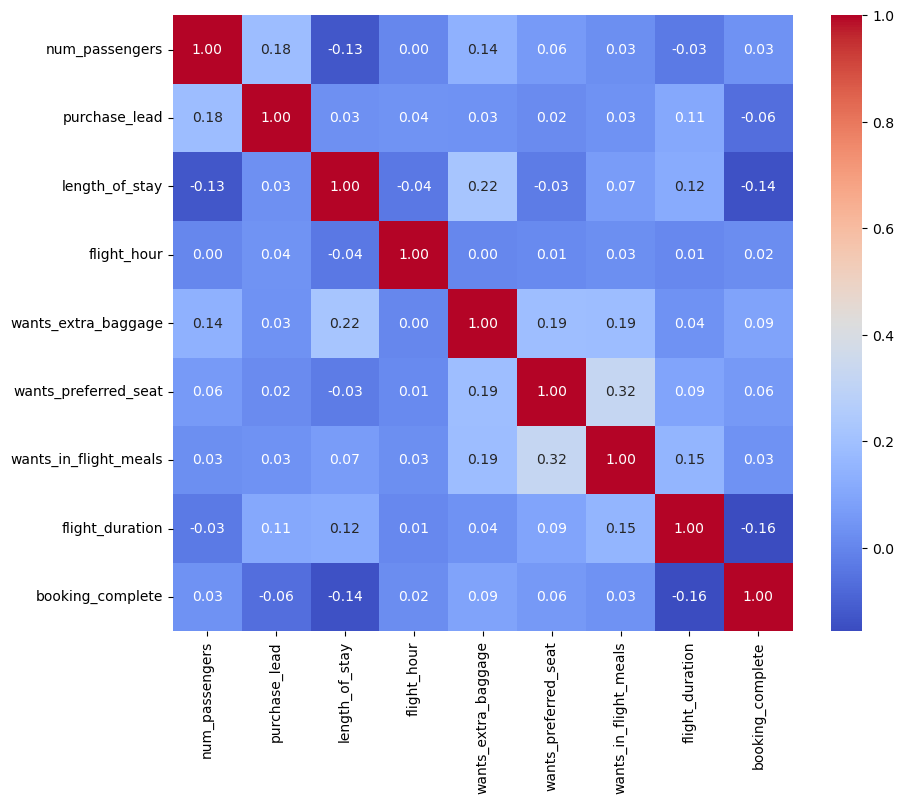

In [51]:
# Calculate the correlation matrix
corr = df1.corr()

# Create a heatmap of the correlation matrix with a coolwarm color map
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.show()

In [52]:
from sklearn.feature_selection import SelectKBest, chi2

# Initialize SelectKBest with chi2 score function
selector = SelectKBest(score_func=chi2, k=10)

# Fit the selector to the training data
selector.fit(train_x1, train_y)

# Get the boolean mask indicating which features are selected
selected_features_mask = selector.get_support()

# Get the names of the selected features
selected_columns = train_x1.columns[selected_features_mask]
print(selected_columns)


Index(['length_of_stay', 'flight_duration', 'route_CMBMEL', 'route_ICNPEN',
       'route_ICNSYD', 'route_MELTPE', 'route_PENTPE',
       'booking_origin_Australia', 'booking_origin_Indonesia',
       'booking_origin_Malaysia'],
      dtype='object')


In [53]:
  from sklearn.ensemble import RandomForestClassifier
import pandas as pd

# Initialize the RandomForestClassifier with a random state for reproducibility
rf_model = RandomForestClassifier(random_state=69)

# Fit the model to the training data
rf_model.fit(train_x1, train_y)

# Get the feature importances from the model
feature_scores = pd.Series(rf_model.feature_importances_, index=train_x1.columns).sort_values(ascending=False)

# Display the feature importances
print(feature_scores)


purchase_lead               0.110284
length_of_stay              0.093898
flight_hour                 0.089607
booking_origin_Australia    0.059305
flight_duration             0.048520
                              ...   
route_BBIOOL                0.000007
route_CSXSYD                0.000006
route_KHHOOL                0.000005
route_MELURT                0.000005
route_BOMSYD                0.000004
Length: 728, dtype: float64


In [54]:
feature_scores[:10]

purchase_lead               0.110284
length_of_stay              0.093898
flight_hour                 0.089607
booking_origin_Australia    0.059305
flight_duration             0.048520
booking_origin_Malaysia     0.031015
num_passengers              0.028524
wants_extra_baggage         0.020698
wants_in_flight_meals       0.020309
wants_preferred_seat        0.017766
dtype: float64

In [55]:
feature_scores.index[:10]

Index(['purchase_lead', 'length_of_stay', 'flight_hour',
       'booking_origin_Australia', 'flight_duration',
       'booking_origin_Malaysia', 'num_passengers', 'wants_extra_baggage',
       'wants_in_flight_meals', 'wants_preferred_seat'],
      dtype='object')

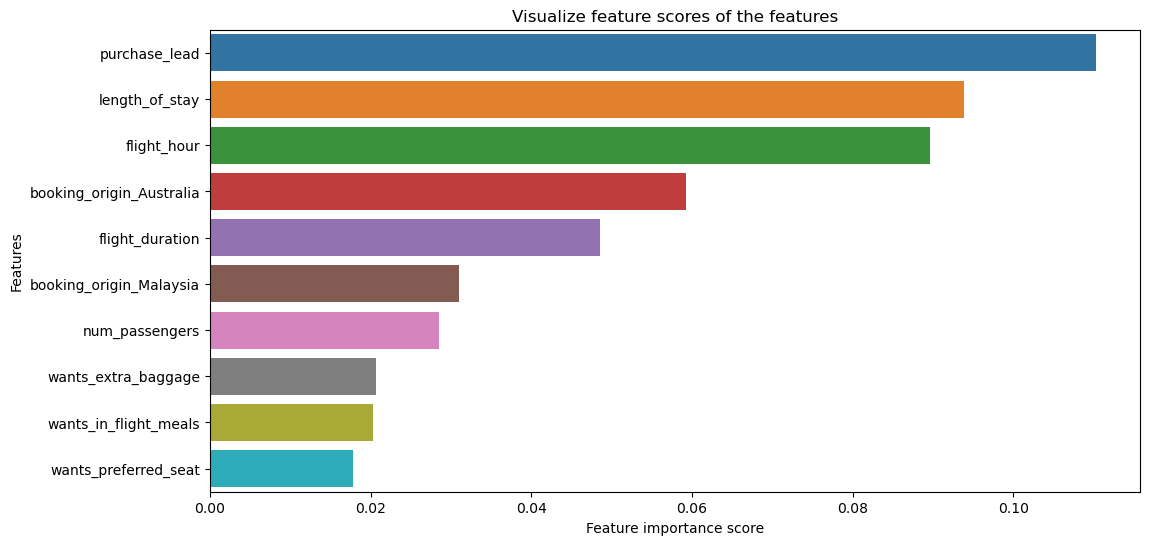

In [56]:
# 'feature_scores' is a Series with feature names as the index and importance scores as values
f, ax = plt.subplots(figsize=(12, 6))
ax = sns.barplot(x=feature_scores[:10].values, y=feature_scores.index[:10])
ax.set_title("Visualize feature scores of the features")
ax.set_yticklabels(feature_scores.index[:10])
ax.set_xlabel("Feature importance score")
ax.set_ylabel("Features")
plt.show()


# Conclusion for British Airways Booking Dataset Analysis

Submitted by: Viraj Panchal

Upon diligent application of various machine learning models to the British Airways booking dataset, we have identified two models that exhibit superior performance. The Logistic Regression model has proven to be slightly more effective, delivering an accuracy of 72.5%, precision of 71.6%, and recall of 74.5%. In close competition, the XGBoost model has achieved an accuracy of 72%, precision of 71%, and recall of 74.6%.

The preference for the Logistic Regression model is attributed to its marginally higher accuracy and precision, which are critical for the reliability of the predictions. This model is thus recommended for the final analysis in the project.

In summary, the Logistic Regression model’s robust performance makes it the optimal choice for forecasting booking completions, which can significantly aid British Airways in enhancing customer satisfaction and improving operational effectiveness.

This project completion by Viraj Panchal stands as a testament to the practical application of machine learning in the aviation industry, paving the way for data-driven strategies and decision-making.